In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy
import sklearn
from math import *
from prettytable import PrettyTable
from functools import partial
from decimal import Decimal

plt.rcParams["font.sans-serif"] = ["Microsoft YaHei"]  # 黑体
plt.rcParams["axes.unicode_minus"] = False  # 解决无法显示符号的问题
palette = "deep"
sns.set(font="Microsoft YaHei", font_scale=1, palette=palette)  # 解决Seaborn中文显示问题

gen|  eval  |    f_opt    |    f_max    |    f_avg    |    f_min    |    f_std    
----------------------------------------------------------------------------------
 0 |   20   | 2.42296E-01 | 6.52808E-01 | 4.99681E-01 | 2.42296E-01 | 7.83197E-02 
 1 |   40   | 2.26358E-01 | 4.97137E-01 | 4.12818E-01 | 2.26358E-01 | 9.17700E-02 
 2 |   60   | 1.54917E-01 | 4.69701E-01 | 3.44092E-01 | 1.54917E-01 | 9.93010E-02 
 3 |   80   | 1.52212E-01 | 3.83972E-01 | 2.71917E-01 | 1.52212E-01 | 7.16474E-02 
 4 |  100   | 9.65656E-02 | 2.46554E-01 | 2.14672E-01 | 9.65656E-02 | 4.04193E-02 
 5 |  120   | 9.57946E-02 | 2.28490E-01 | 1.70529E-01 | 9.57946E-02 | 5.17792E-02 
 6 |  140   | 9.57946E-02 | 2.09178E-01 | 1.42717E-01 | 9.57946E-02 | 3.81763E-02 
 7 |  160   | 9.57946E-02 | 1.52212E-01 | 1.09893E-01 | 9.57946E-02 | 2.23594E-02 
 8 |  180   | 9.66153E-03 | 9.70584E-02 | 9.19073E-02 | 9.66153E-03 | 1.88790E-02 
 9 |  200   | 9.66153E-03 | 9.65656E-02 | 9.16014E-02 | 9.66153E-03 | 1.88127E-02 
 10|

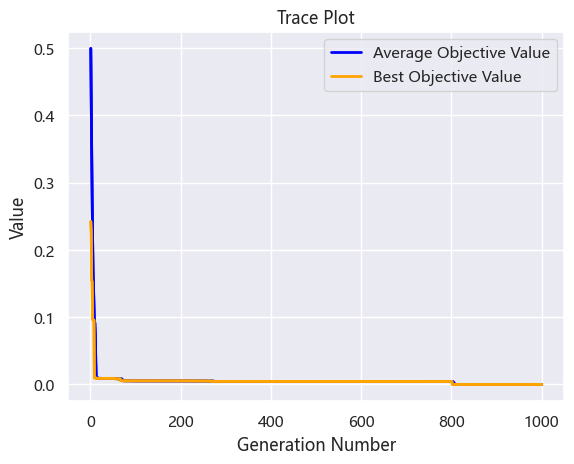

Execution time: 0.3558008670806885 s
Evaluation number: 20000
The best objective value is: 7.100098287082801e-12
The best variables are: 
6.966292858123779e-05	4.7404319047927856e-05	


In [4]:
import geatpy as ea
import numpy as np


def schaffer(p):
    """
    This function has plenty of local minimum, with strong shocks
    global minimum at (0,0) with value 0
    https://en.wikipedia.org/wiki/Test_functions_for_optimization
    """
    x1, x2 = p
    part1 = np.square(x1) - np.square(x2)
    part2 = np.square(x1) + np.square(x2)
    return 0.5 + (np.square(np.sin(part1)) - 0.5) / np.square(1 + 0.001 * part2)


# 构建问题
r = 1  # 目标函数需要用到的额外数据


@ea.Problem.single
def evalVars(Vars):  # 定义目标函数（含约束）
    f = schaffer(Vars)  # 计算目标函数值
    CV = np.array([])  # 计算违反约束程度
    return f, CV


problem = ea.Problem(
    name="soea quick start demo",
    M=1,  # 目标维数
    maxormins=[1],  # 目标最小最大化标记列表，1：最小化该目标；-1：最大化该目标
    Dim=2,  # 决策变量维数
    varTypes=[0, 0],  # 决策变量的类型列表，0：实数；1：整数
    lb=[-100, -100],  # 决策变量下界
    ub=[100, 100],  # 决策变量上界
    evalVars=evalVars,
)
# 构建算法
algorithm = ea.soea_SEGA_templet(
    problem,
    ea.Population(Encoding="RI", NIND=20),
    MAXGEN=1000,  # 最大进化代数。
    logTras=1,  # 表示每隔多少代记录一次日志信息，0表示不记录。
    maxTrappedCount=10,
)  # 进化停滞计数器最大上限值。
# 求解
res = ea.optimize(
    algorithm,
    seed=1,
    verbose=True,
    drawing=1,
    outputMsg=True,
    drawLog=False,
    saveFlag=True,
    dirName="result",
)